# Titanic

Utilizziamo il dataset Titanic per provare nuovamente il nostro metodo K-NN. Vogliamo prevedere se un passeggero con determinate caratteristiche sarebbe sopravvissuto o meno al naufragio.

# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


La colonna 'Survived' è la nostra variabile target. Se vale 0 vuol dire che il passeggero non è sopravvissuto, se vale 1 vuol dire che è sopravvissuto. Visualizziamo il numero di sopravvissuti e non sopravvissuti:

In [ ]:
dfa = df.drop(df[df['Age'].isnull()].index)
dfa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Elimino le colonne superflue
dfa = dfa.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis =1)
dfa

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
889,1,1,male,26.0,0,0,30.0000


In [ ]:
dfa.replace({'Sex': {'male': 0, 'female': 1},}, inplace=True)
dfa

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [ ]:
dfa.groupby('Survived').count().Sex

Survived
0    424
1    290
Name: Sex, dtype: int64

Possiamo vedere che il dataset contiene 891 record, 549 relativi a passeggeri sopravvissuti e 342 relativi a passeggeri non sopravvissuti. Visualizziamo un grafico riepilogativo:

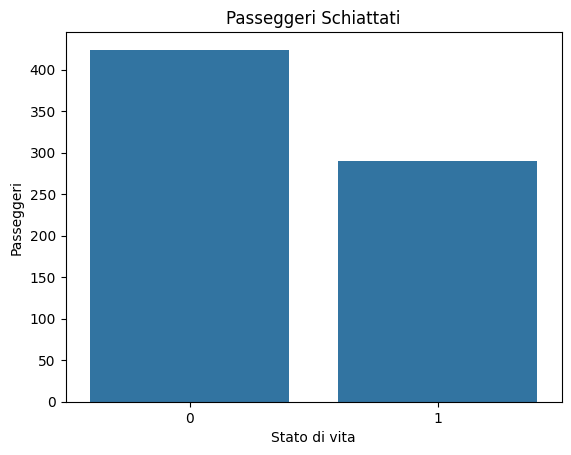

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data= dfa)
plt.title("Passeggeri Schiattati")
plt.xlabel("Stato di vita")
plt.ylabel("Passeggeri")
plt.show()

Vediamo che i record da utilizzare rimasti sono 714, contro gli 891 iniziali.
Trasformiamo ora il nostro dataframe in una matrice Numpy per l'elaborazione:

Separiamo ora le osservazioni (cioè le variabili indipendenti) dalla variabile target (cioè dalal variabile dipendente, in questo caso 'Survived'):

In [ ]:
import numpy as np
x=dfa.drop(columns='Survived').to_numpy()
y=dfa['Survived'].to_numpy()

Visualizziamo le prime 10 righe:

In [ ]:
print('x', x[:10])
print('y', y[:10])

x [[ 3.      0.     22.      1.      0.      7.25  ]
 [ 1.      1.     38.      1.      0.     71.2833]
 [ 3.      1.     26.      0.      0.      7.925 ]
 [ 1.      1.     35.      1.      0.     53.1   ]
 [ 3.      0.     35.      0.      0.      8.05  ]
 [ 1.      0.     54.      0.      0.     51.8625]
 [ 3.      0.      2.      3.      1.     21.075 ]
 [ 3.      1.     27.      0.      2.     11.1333]
 [ 2.      1.     14.      1.      0.     30.0708]
 [ 3.      1.      4.      1.      1.     16.7   ]]
y [0 1 1 1 0 0 0 1 1 1]


# Split data into training/test set

Una volte preparate i dati, partiamo con il nostro metodo. la prima cosa da fare è separare i dati in training set e test set:

In [ ]:
pip install sklearn (se non lo abbiamo già fatto)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install sklearn (se non lo abbiamo già fatto)'


In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.30,
                                                    stratify = y, #manteniamo le proporzioni
                                                    random_state = 123) # serve a prendere i dati ugualmente

Vediamo come è stata fatta la suddivisione in traning set e test set:

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((499, 6), (499,), (215, 6), (215,))

Come vediamo X_train è una matrice da 468 righe (cioè passeggeri) e 6 colonne (le varie registrazioni: età, sesso, ...), y_train è un vettore di 478 righe (le informazioni riguardanti la sopravvivenza o meno del passeggero), X_test è una matrice da 236 righe (cioè passeggeri) e 6 colonne (le varie registrazioni: età, sesso, ...) e infine y_test è un vettore di 236 righe (le informazioni riguardanti la sopravvivenza o meno del passeggero). X_train e y_train verranno usate per allenare il metodo, X_test e y_test verranno usate per vedere se il metodo ha imparato bene.
Vediamo le prime 10 righe di X_train e y_train:

In [ ]:
np.set_printoptions(suppress=True)
print(f'x_train = {X_train[:10]}')
print(f'y_train = {y_train[:10]}')

x_train = [[  1.       0.      62.       0.       0.      26.55  ]
 [  2.       0.      23.       0.       0.      10.5   ]
 [  3.       0.      20.       1.       1.      15.7417]
 [  3.       0.      47.       0.       0.       9.    ]
 [  3.       0.      30.       0.       0.       8.05  ]
 [  3.       0.      18.       1.       0.       6.4958]
 [  3.       0.       8.       4.       1.      29.125 ]
 [  1.       0.      35.       0.       0.      26.55  ]
 [  3.       0.      40.       1.       4.      27.9   ]
 [  1.       1.      25.       1.       2.     151.55  ]]
y_train = [0 0 1 0 0 0 0 1 0 0]


# Train the classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Alleniamo il nostro metodo K-NN:

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)
print(f'dati predetti dal metodo =                {predict}')
print(f'dati reali presenti nel dataset di test = {y_test}')

dati predetti dal metodo =                [0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0
 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0]
dati reali presenti nel dataset di test = [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1
 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0]


Vediamo come ha funzionato il nostro metodo analizzando i primi 10 passeggeri (ricordiamoci che 1 vuol dire che il passeggero è sopravvissuto, 0 che non è sopravvissuto)<br>

- veri positivi (true positive, __TP__): tre passeggeri (nn. 1, 7 e 10) sono stati classificati come sopravvissuti ed effettivamente lo erano
- veri negativi (true negative, __TN__): cinque passeggeri (nn. 2, 3, 4, 6 e 8) sono stati classificati come __non__ sopravvissuti ed effettivamente non sono sopravvissuti
- falsi negativi (false negative, __FN__): nessun passeggero è stato classificato come __non__ sopravvissuto anche se è sopravvissuto
- falsi positivi (false positive, __FP__): due passeggeri (nn. 5 e 9) sono stati classificati come sopravvissuti anche se in realtà __non__ sono sopravvissuti

valutiamo però ora i risultati nella loro interezza.

# Evaluate the results

Per valutare il nostro metodo, visualizziamo prima la cosiddetta "confusion matrix"

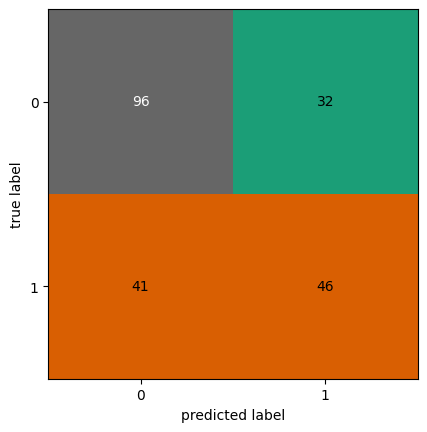

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

Vediamo di capire il suo significato, riprendendo l'esempio precedente e tenendo presente che le __predicted label__ rappresentano le previsioni del metodo (1 il paziente è sopravvissuto, 0 no) mentre le __true label__ rappresentano i dati reali presenti nel dataset (1 il paziente è sopravvissuto, 0 no):

- veri positivi (true positive, __TP__): 50 pazienti sono stati classificati come sopravvissuti (predicted label = 1) ed effettivamente sono sopravvissuti (true label = 1)
- veri negativi (true negative, __TN__): 108 pazienti sono stati classificati come __non__ sopravvissuti (predicted label = 0) ed effettivamente __non__ sono sopravvissuti (true label = 0)
- falsi negativi (false negative, __FN__): 46 pazienti sono stati classificati come __non__ sopravvissuti (predicted label = 0)  anche se in realtà sono sopravvissuti (true label = 1)
- falsi positivi (false positive, __FP__): 32 pazienti sono stati classificati come sopravvissuti (predicted label = 1) anche se in realtà __non__ sono sopravvissuti (true label = 0)

Per avere comunque un quadro riassuntivo, stampiamo il report con i valori dei vari indicatori:

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       128
           1       0.59      0.53      0.56        87

    accuracy                           0.66       215
   macro avg       0.65      0.64      0.64       215
weighted avg       0.66      0.66      0.66       215



Come possiamo vedere, il metodo funziona meglio per prevedere se un pazione __non__ è sopravvissuto: la precision e la recall sono infatti maggiori quando il target è uguale a 0 (passeggero non sopravvissuto)

# Utilizzare il metodo

Al di là dei risultati che ci hanno dato i nostri indicatori, supponiamo che il nostro metodo sia un ottimo metodo per valutare (classificare) se una persona è sopravvissuta o no: come possiamo applicarlo ai dati di un passeggero? Supponiamo per esempio che Maria sia una passeggera con le seguenti carattreristiche:

In [ ]:
# !pip install tabulate

In [ ]:
from tabulate import tabulate

info = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] # nome delle misurazioni

Maria= [[1, 0, 35.0, 1, 0, 53.100]] # valore delle misurazioni
print(tabulate([Maria], headers=info))

Pclass
------------------------
[1, 0, 35.0, 1, 0, 53.1]


Proviamo a far girare il nostro metodo con questi dati e vediamo che previsione fa:

In [ ]:
# previsione per Maria
schiattata = neigh.predict(Maria)
print(schiattata)

[1]


La risposta è 1, cioà il metodo dice che Maria sarebbe sopravvissuta (cioè, visto che stiamo usando il metodo K-NN, Maria è più 'vicina' a passeggeri che sono sopravvissuti). Ma vediamo ora che cosa sarebbe successo se Maria avesse un 65 anni invece di 35:

In [ ]:
# nuova previsione per Maria
Maria= [[1, 0, 65.0, 1, 0, 53.100]]
schiattata = neigh.predict(Maria)
print(schiattata)

[0]
